## Pengaruh Pengetahuan Investasi dan Manfaat Investasi Terhadap Minat Berinvestasi di Pasar Modal Indonesia 
### (Studi Kasus: Mahasiswa Jurusan Manajemen 2019 Universitas Negeri Semarang)

## Import Modul

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm #Modelling
from statsmodels.stats.descriptivestats import Description # descriptive statistics
from scipy.stats import shapiro # uji asumsi normalitas
from statsmodels.stats.diagnostic import het_breuschpagan # uji asumsi homoskedastisitas
from statsmodels.stats.stattools import durbin_watson # uji asumsi non-autokorelasi
from statsmodels.stats.outliers_influence import variance_inflation_factor # uji multikolinearitas

print('imported') # Checking

imported


In [5]:
def compare(pvalue, alpha=0.05):
    if pvalue < alpha:
        return '{:.3f} < {}, H0 ditolak'.format(pvalue, alpha)
    else:
        return '{:.3f} > {}, H0 diterima'.format(pvalue, alpha)
    
def sign(num):
    return '-' if num < 0 else '+'

## Persiapan Data

In [4]:
df = pd.read_excel('data kuesioner pengetahuan investasi prodi manajemen 19 unnes.xlsx', sheet_name= 'Analisis')

In [5]:
df.head()

,Responden,X1.1,X1.2,X1.3,X1.4,X1.5,X1.6,X1.7,X2.1,X2.2,...,X2.4,X2.5,X2.6,Y1,Y2,Y3,Y4,Y5,Y6,Y7
0,1,5,4,4,4,4,4,4,5,4,...,4,5,4,4,4,5,4,5,4,5
1,2,4,5,5,4,3,5,4,4,5,...,5,3,4,5,5,3,3,4,5,4
2,3,4,4,4,4,3,3,3,3,3,...,3,4,3,3,3,3,3,3,4,3
3,4,5,5,5,5,5,5,3,4,5,...,5,4,4,4,4,4,4,4,4,4
4,5,5,5,5,5,5,5,5,4,5,...,4,4,4,4,5,5,4,4,5,4


In [6]:
# Menambahkan kolom baru yang merupakan penjumlahan baris untuk pengetahuan investasi (X1)
df['Pengetahuan_Investasi'] = df.filter(like='X1').sum(axis=1)

# Menambahkan kolom baru yang merupakan penjumlahan baris untuk manfaat investasi (X2)
df['Manfaat_Investasi'] = df.filter(like='X2').sum(axis=1)

# Menambahkan kolom baru yang merupakan penjumlahan baris untuk minat investasi (Y)
df['Minat_Investasi'] = df.filter(like='Y').sum(axis=1)

In [25]:
df

,Responden,X1.1,X1.2,X1.3,X1.4,X1.5,X1.6,X1.7,X2.1,X2.2,...,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Pengetahuan_Investasi,Manfaat_Investasi,Minat_Investasi
0,1,5,4,4,4,4,4,4,5,4,...,4,4,5,4,5,4,5,29,26,31
1,2,4,5,5,4,3,5,4,4,5,...,5,5,3,3,4,5,4,30,26,29
2,3,4,4,4,4,3,3,3,3,3,...,3,3,3,3,3,4,3,25,20,22
3,4,5,5,5,5,5,5,3,4,5,...,4,4,4,4,4,4,4,33,27,28
4,5,5,5,5,5,5,5,5,4,5,...,4,5,5,4,4,5,4,35,26,31
5,6,5,4,4,3,4,4,4,4,4,...,4,5,4,5,4,4,4,28,23,30
6,7,5,5,5,5,5,5,4,4,4,...,5,5,4,4,4,4,4,34,24,30
7,8,5,5,4,4,5,3,4,4,5,...,4,4,4,4,4,2,3,30,23,25
8,9,5,5,5,4,4,5,3,4,5,...,4,3,4,3,5,3,4,31,27,26
9,10,5,5,4,2,4,3,1,4,4,...,4,5,3,5,4,5,4,24,26,30


In [7]:
df = df[['Pengetahuan_Investasi', 'Manfaat_Investasi', 'Minat_Investasi']]

In [28]:
df.head()

,Pengetahuan_Investasi,Manfaat_Investasi,Minat_Investasi
0,29,26,31
1,30,26,29
2,25,20,22
3,33,27,28
4,35,26,31


### Cek Missing value dan Duplikat

In [29]:
print("Jumlah missing value tiap kolom:")
print(df.isnull().sum())

print("\nJumlah duplikat:")
print(df.duplicated().sum())

Jumlah missing value tiap kolom:
Pengetahuan_Investasi    0
Manfaat_Investasi        0
Minat_Investasi          0
dtype: int64

Jumlah duplikat:
2


Tidak terdapat data missing value dalam hal ini dan terlihat bahwa data tersebut terdapat duplikat, mari kita cek apakah data tersebut berasal dari responden yang sama?

In [30]:
# Mengecek data duplikat
duplikat = df[df.duplicated()]

if not duplikat.empty:
    print("Data duplikat ditemukan pada responden nomor:")
    for index, row in duplikat.iterrows():
        print(index)
else:
    print("Tidak ada data duplikat dalam DataFrame.")

Data duplikat ditemukan pada responden nomor:
34
47


In [31]:
#ambil sheet 'Responden'
Responden = pd.read_excel('data kuesioner pengetahuan investasi prodi manajemen 19 unnes.xlsx', sheet_name= 'Responden')

In [32]:
Responden.head() 

,Responden,Timestamp,Email,Nama,Jenis Kelamin,Prodi Manajemen 2019 UNNES
0,1,2022/05/21 12:28:55 PM GMT+7,kharisnaasarany@students.unnes.ac.id,Kharisna,Perempuan,Ya
1,2,2022/05/21 3:43:34 PM GMT+7,ddevi0825@gmail.com,Julfina Mulya Sari Devi,Perempuan,Ya
2,3,2022/05/21 3:52:45 PM GMT+7,mariotriali04@gmail.com,Mario triali,Laki-Laki,Ya
3,4,2022/05/21 6:32:48 PM GMT+7,herlinaandria24@gmail.com,Herlina,Perempuan,Ya
4,5,2022/05/22 7:45:01 AM GMT+7,sofianrafif.200@gmail.com,Sofian,Laki-Laki,Ya


In [35]:
Responden[(Responden['Responden'] == 34) | (Responden['Responden'] == 47)]

,Responden,Timestamp,Email,Nama,Jenis Kelamin,Prodi Manajemen 2019 UNNES
33,34,2022/05/25 6:40:38 PM GMT+7,putrihermalia442@gmail.com,Hermalia Adinda Putri,Perempuan,Ya
46,47,2022/05/27 8:24:09 PM GMT+7,annimaghfiroh10@gmail.com,Anni Maghfiroh,Perempuan,Ya


terlihat bahwa responden tersebut merupakan 2 orang yag berbeda, dalam hal ini emang murni data tersebut duplikat dari hasil pengisian kuesioner yang kebetulan nilainya sama.

## Exploratory Data Analysis

### Statistika Deskriptif

In [36]:
Description(data=df).summary()

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\stats\descriptivestats.py:418: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_res = stats.mode(ser.dropna())


nobs,51.0,51.0,51.0
missing,0.0,0.0,0.0
mean,31.627450980392158,24.980392156862745,28.41176470588235
std_err,0.05289915315646276,0.055249626945693624,0.05492667099220395
upper_ci,31.731131415391495,25.08867943583558,28.519419002817752
lower_ci,31.52377054539282,24.87210487788991,28.30411040894695
std,2.6978568109796006,2.8177309742303747,2.8012602206024013
iqr,3.0,4.0,3.0
iqr_normal,2.223903327758403,2.965204437011204,2.223903327758403
mad,2.075355632449059,2.2968089196462897,2.214532871972319
mad_normal,2.6010725541057567,2.8786230897050356,2.775505355992804


In [8]:
df.describe()

,Pengetahuan_Investasi,Manfaat_Investasi,Minat_Investasi
count,51.000000,51.000000,51.000000
mean,31.627451,24.980392,28.411765
std,2.697857,2.817731,2.801260
min,24.000000,19.000000,22.000000
25%,30.500000,23.000000,27.000000
50%,32.000000,25.000000,29.000000
75%,33.500000,27.000000,30.000000
max,35.000000,30.000000,33.000000


Ini adalah output yang dihasilkan dari statistik deskriptif untuk tiga variabel yang berbeda. Di sini, beberapa istilah penting yang perlu diperhatikan adalah:

1. nobs: Jumlah observasi atau jumlah data yang diamati untuk setiap variabel.
2. mean: Rata-rata atau nilai tengah dari distribusi data.
3. std: Standar deviasi, mengukur seberapa jauh data tersebar dari rata-rata.
4. min dan max: Nilai minimum dan maksimum dalam dataset.
5. skew: Skewness, mengukur sejauh mana distribusi data miring ke kiri atau ke kanan.
6. kurtosis: Kurtosis, mengukur seberapa tinggi dan tajam puncak distribusi data.
7. median: Median, nilai tengah dalam dataset.
8. Persentil (1%, 5%, 10%, 25%, 50%, 75%, 90%, 95%, 99%): Nilai yang membagi data menjadi persentase tertentu.
9. mode: Mode, nilai yang paling sering muncul dalam dataset.
10. mode_freq: Frekuensi kemunculan mode dalam dataset.

### PiePlot

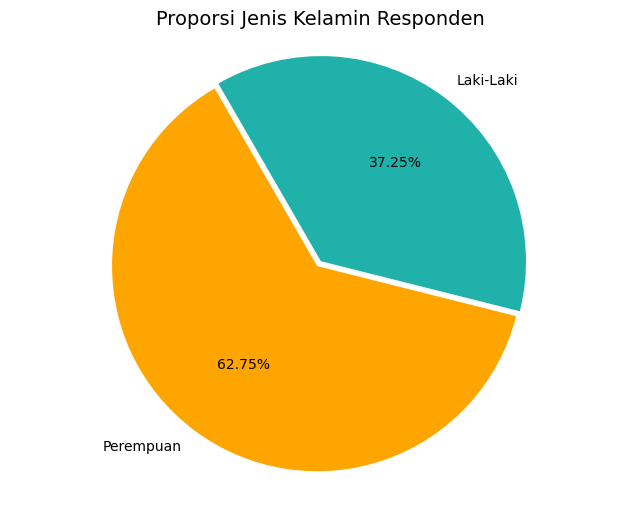

In [128]:
labels=['Perempuan', 'Laki-Laki']
size = Responden['Jenis Kelamin'].value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 6))

colors = ['#FFA500', '#20B2AA']  # warna untuk setiap bagian
explode = (0.03, 0)  # menambahkan celah di tengah lingkaran
plt.pie(size, labels=labels, autopct='%1.2f%%', startangle=120, colors=colors, explode=explode)

# Menambahkan judul
plt.title('Proporsi Jenis Kelamin Responden', fontsize=14)

# Menampilkan pie chart
plt.axis('equal')
plt.show()

<AxesSubplot:xlabel='Jenis Kelamin', ylabel='count'>

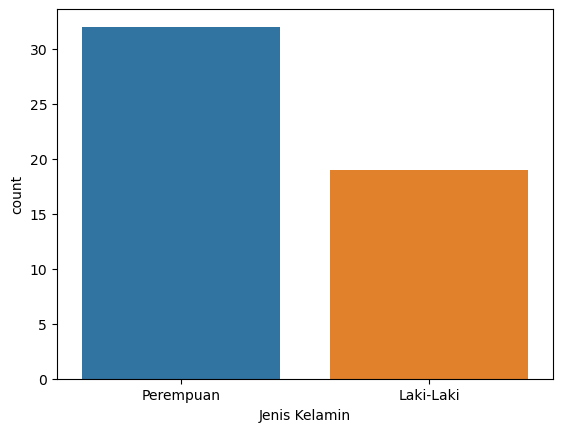

In [123]:
sns.countplot(x='Jenis Kelamin',data=Responden)

### Histogram dan distribusi data

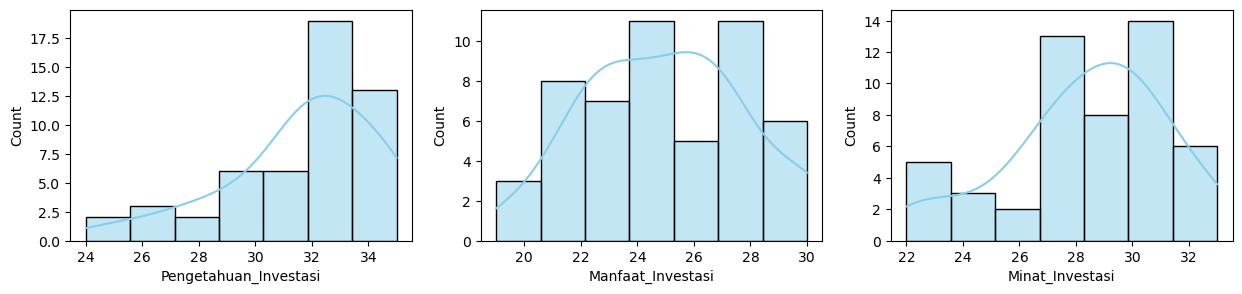

In [38]:
plt.figure(figsize=(15,3))

plt.subplot(1, 3, 1)
sns.histplot(df['Pengetahuan_Investasi'], kde=True, color='skyblue')
plt.subplot(1, 3, 2)
sns.histplot(df['Manfaat_Investasi'], kde=True, color='skyblue')
plt.subplot(1, 3, 3)
sns.histplot(df['Minat_Investasi'], kde=True, color='skyblue')

# Menampilkan histogram
plt.show()

Interpretasi distribusi dari variabel-variabel dalam data pengetahuan investasi, manfaat investasi, dan minat investasi dapat dijelaskan sebagai berikut:

1. Pengetahuan Investasi: Distribusi data pengetahuan investasi menunjukkan variasi yang signifikan antara responden. Mayoritas responden memiliki tingkat pengetahuan investasi yang berkisar antara 32 hingga 34, namun ada beberapa responden yang memiliki pengetahuan investasi yang lebih rendah atau lebih tinggi dari rentang tersebut.

2. Manfaat Investasi: Distribusi data manfaat investasi juga menunjukkan variasi yang cukup besar antar responden. Mayoritas responden memiliki persepsi tentang manfaat investasi yang berkisar antara 22 hingga 30, tetapi ada beberapa responden yang menilai manfaat investasi lebih rendah atau lebih tinggi dari rentang tersebut.

3. Minat Investasi: Distribusi data minat investasi juga menunjukkan variasi yang cukup besar antar responden. Mayoritas responden memiliki minat investasi yang berkisar antara 28 hingga 30, namun ada beberapa responden yang memiliki minat investasi lebih rendah atau lebih tinggi dari rentang tersebut.

### Pair Plot

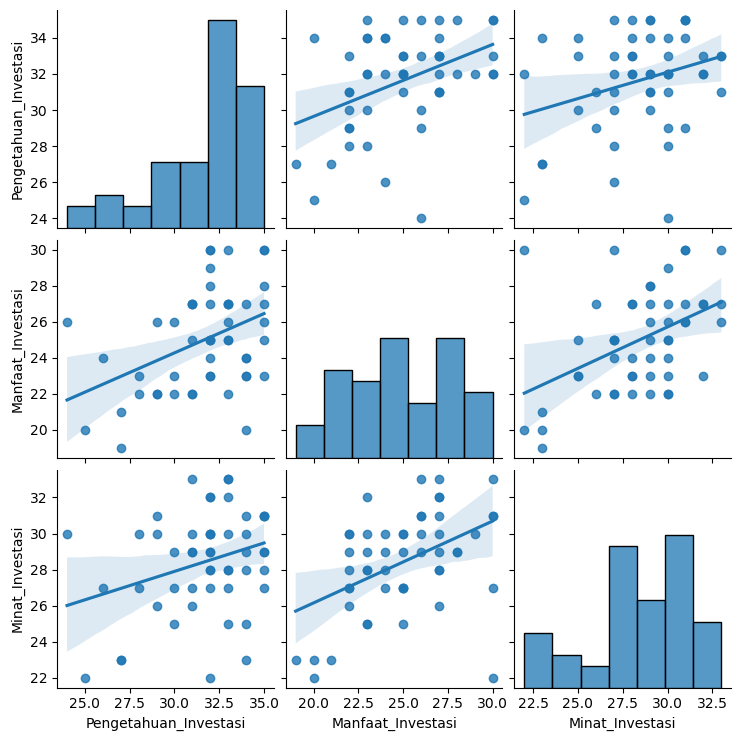

In [41]:
sns.pairplot(df, kind='reg')

### Matriks Korelasi

digunakan untuk mengevaluasi hubungan antara dua variabel dalam suatu kumpulan data. Nilai 1 dianggap hubungan antar variabel kuat positif, 0 dianggap tidak ada hubungan, dan -1 dianggap hubungan kuat negatif.

diketahui bahwa kedua variabel merupakan data berskala rasio dan berasal dari dua sumber yang berbeda atau tidak berpasangan sehingga pengujian hipotesis korelasi antar variabel dapat dilakukan menggunakan uji Pearson atau Spearman tergantung dari distribusi data. Jika kedua variabel berdistribusi normal, maka pengujian akan dilakukan menggunakan uji Pearson. Jika tidak, maka akan digunakan uji Spearman.

1. Uji Pearson : statistika parametrik, data berpasangan maupun tidak, harus memenuhi asumsi normalitas, data berskala interval atau rasio.
2. Uji Spearman : statistika non parametrik, berasal dari sumber yang berbeda atau tidak berpasangan, tidak perlu berdistribusi normal, data berskala interval atau rasio, bisa digunakan untuk data berskala ordinal.

sehingga dilakukan uji normalitas untuk masing-masing variabel

H0 : data berdistribusi normal\
H1 : data tidak berdistribusi normal

dengan α = 0.05
tolak H0 jika p-value < α

In [42]:
df.head()

,Pengetahuan_Investasi,Manfaat_Investasi,Minat_Investasi
0,29,26,31
1,30,26,29
2,25,20,22
3,33,27,28
4,35,26,31


In [50]:
for i in df.columns:
    statistic, pvalue = shapiro(df[i])
    print('{} : nilai statistic sebesar: {:.4f}'.format(i, statistic))
    print('{} : nilai pvalue sebesar: {:.4f}'.format(i, pvalue))
    print('keputusan : {}\n'.format(compare(pvalue)))

Pengetahuan_Investasi : nilai statistic sebesar: 0.9130
Pengetahuan_Investasi : nilai pvalue sebesar: 0.0012
keputusan : 0.001 < 0.05, H0 ditolak

Manfaat_Investasi : nilai statistic sebesar: 0.9641
Manfaat_Investasi : nilai pvalue sebesar: 0.1241
keputusan : 0.124 > 0.05, H0 diterima

Minat_Investasi : nilai statistic sebesar: 0.9491
Minat_Investasi : nilai pvalue sebesar: 0.0290
keputusan : 0.029 < 0.05, H0 ditolak



#### Menggunakan data residual untuk mengetahui apakah data tersebut normal atau tidak

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Pengetahuan_Investasi  51 non-null     int64
 1   Manfaat_Investasi      51 non-null     int64
 2   Minat_Investasi        51 non-null     int64
dtypes: int64(3)
memory usage: 1.3 KB


In [62]:
import pandas as pd
import statsmodels.api as sm

# Misalkan Anda memiliki DataFrame 'df' yang berisi data Anda

# Pisahkan variabel independen (X) dan variabel dependen (y)
X = df[['Pengetahuan_Investasi', 'Manfaat_Investasi']]  # Variabel independen
y = df['Minat_Investasi']  # Variabel dependen

# Tambahkan konstanta ke variabel independen
X = sm.add_constant(X)

# Buat model regresi
model = sm.OLS(y, X)

# Fit model ke data
results = model.fit()

# Dapatkan nilai residual
residuals = results.resid

# Tampilkan data residual
residuals

0     2.556397
1     0.414205
2    -3.488982
3    -1.410011
4     1.703248
5     2.891516
6     1.640725
7    -2.392867
8    -3.125629
9     2.267353
10   -3.171008
11   -1.694394
12   -8.460748
13    2.732180
14   -2.375723
15    3.987631
16    4.322750
17    0.640725
18   -3.614726
19    1.447797
20    0.112678
21    0.589989
22   -3.460748
23   -0.853033
24    0.527465
25   -0.074892
26   -1.614726
27    3.146967
28    0.289158
29    1.527465
30   -0.665463
31    3.874371
32   -0.063105
33    2.862584
34    1.527465
35   -1.092037
36   -2.961632
37    2.397061
38   -1.899109
39    0.038368
40    1.862584
41    0.896176
42    0.004776
43    2.589989
44   -3.768705
45   -1.330344
46    0.578202
47    0.112678
48   -0.221744
49    0.322750
50   -0.125629
dtype: float64

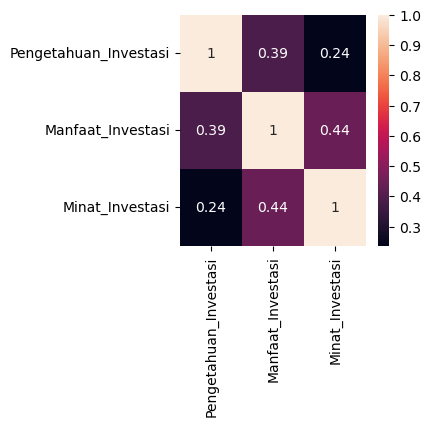

In [68]:
corr_matrix = df.corr(method='spearman')
plt.figure(figsize=(3,3))
sns.heatmap(corr_matrix, annot=True);

## Modeling

In [ ]:
# gini juga sama untuk mendapatkan nilai residual

import pandas as pd
import statsmodels.api as sm

# Misalkan Anda memiliki DataFrame 'df' yang berisi data Anda

# Pisahkan variabel independen (X) dan variabel dependen (y)
X = df[['Pengamatan1', 'Pengamatan2', 'Pengamatan3']]  # Variabel independen
y = df['Variabel_Tergantung']  # Variabel dependen

# Tambahkan konstanta ke variabel independen
X = sm.add_constant(X)

# Buat model regresi
model = sm.OLS(y, X)

# Fit model ke data
results = model.fit()

# Dapatkan nilai residual
residuals = results.resid

# Tampilkan data residual
print(residuals)

In [75]:
# Pisahkan variabel independen (X) dan variabel dependen (y)
X = np.array(df[['Pengetahuan_Investasi', 'Manfaat_Investasi']])  # Variabel independen
y = np.array(df['Minat_Investasi'])  # Variabel dependen

In [76]:
# Perlu ditambahkan nilai konstanta di kolom pertama
X = sm.add_constant(X)
X[:3]

array([[ 1., 29., 26.],
       [ 1., 30., 26.],
       [ 1., 25., 20.]])

In [78]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     6.946
Date:                Wed, 14 Feb 2024   Prob (F-statistic):            0.00224
Time:                        20:27:00   Log-Likelihood:                -117.91
No. Observations:                  51   AIC:                             241.8
Df Residuals:                      48   BIC:                             247.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.9813      4.469      3.129      0.003       4.996      22.967
x1             0.1422      0.145      0.979      0.332      -0.150       0.434
x2             0.3976      0.139      2.860      0.006       0.118       0.677
==============================================================================
Omnibus:                        7.879   Durbin-Watson:                   2.126
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                7.143
Skew:                          -0.727   Prob(JB):                       0.0281
Kurtosis:                       4.116   Cond. No.                         513.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Uji Asumsi Klasik
Sebelum dilakukan Uji Hipotesis dan Interpretasi Model, akan dilakukan Uji Asumsi terhadap residual model.\
Uji Asumsi meliputi:

1. Asumsi Normalitas
3. Asumsi Homoskedastisitas
4. Asumsi Non-Autokorelasi
5. Asumsi Non-Multikolinearitas

references : https://www.statsmodels.org/stable/diagnostic.html#diagnostics

### Asumsi Normalitas
Tujuan : untuk mengetahui apakah residual data berdistribusi normal atau tidak.\
H0 : residual berdistribusi normal\
H1 : residual tidak berdistribusi normal

dengan α = 0.05
tolak H0 jika p-value < α

In [80]:
residuals = model.resid
statistic, pvalue = shapiro(residuals)
print('nilai statistic sebesar: {:.4f}'.format(statistic))
print('nilai pvalue sebesar: {:.4f}'.format(pvalue))

nilai statistic sebesar: 0.9574
nilai pvalue sebesar: 0.0645


Kesimpulan:

Berdasarkan hasil uji normalitas diketahui bahwa p-value 0,0645 > 
0,05, maka dapat disimpulkan bahwa nilai residual berdistribusi normal.\
(asumsi normalitas terpenuhi)

### Asumsi Homoskedastisitas
Tujuan : untuk mengetahui apakah varian dari residual konstan atau tidak.\
H0 : varian dari residual konstan\
H1 : varian dari residual tidak konstan.

dengan α = 0.05\
tolak H0 jika p-value < α


In [81]:
BP, pvalue, _, _ = het_breuschpagan(residuals, X)
print('nilai breusch-pagan sebesar: {:.4f}'.format(BP))
print('nilai pvalue sebesar: {:.4f}'.format(pvalue))

nilai breusch-pagan sebesar: 2.0262
nilai pvalue sebesar: 0.3631


diperoleh nilai p-value 0.3631 > 0.05

dapat disimpulkan bahwa pada taraf signifikansi 5%, H0 diterima sehingga varian dari residual model konstan.\
(asumsi homoskedastisitas terpenuhi)

### Asumsi Non-Autokorelasi
Metode pengujian yang sering digunakan adalah dengan uji Durbin-Watson (uji DW)

dengan hipotesis yang digunakan adalah\
H0 : Tidak ada autokorelasi antar residual amatan dan\
H1 : Ada autokorelasi antar residual amatan. Adapun kriteria uji yang digunakan adalah sebagai berikut.

Jika 0 < d < dL maka terdapat autokorelasi positif\
Jika dL < d < dU maka pengujian tidak meyakinkan atau tidak ada kesimpulan yang pasti\
Jika dU < d < 4 - dU maka tidak terdapat autokorelasi\
Jika 4 - dU < d < 4 - dL maka pengujian tidak meyakinkan atau tidak ada kesimpulan yang pasti\
Jika 4 – dL < d < 4 maka terdapat autokorelasi negatif\
dengan α = 0.05\
tolak H0 jika p-value < α

Diperoleh nilai DU dan DL dari tabel berikut :\
http://repository.unpkediri.ac.id/5725/9/RAMA_61201_18102020014_0706108902_0728068702_07_lamp.pdf

dengan α = 5%, n = 38, k = 3\
DL : 1.4273\
DU : 1.6754

In [84]:
DL = 1.4273
DU = 1.6754

d = durbin_watson(residuals)

print('nilai DU : {:.4f}'.format(DU))
print('nilai DL : {:.4f}'.format(DL))
print('nilai Durbin-Watson : {:.4f}'.format(d))
print('\nkesimpulan :')

if d < DL:
    print('0 < d < DL, terdapat autokorelasi positif')
elif d < DU:
    print('DL < d < DU, pengujian tidak meyakinkan atau tidak ada kesimpulan yang pasti')
elif d < (4 - DU):
    print('DU < d < 4-DU, tidak terdapat autokorelasi')
elif d < (4 - DL):
    print('4-DU < d < 4-DL, pengujian tidak meyakinkan atau tidak ada kesimpulan yang pasti')
else:
    print('4-DL < d < 4, terdapat autokorelasi negatif')

nilai DU : 1.6754
nilai DL : 1.4273
nilai Durbin-Watson : 2.1259

kesimpulan :
DU < d < 4-DU, tidak terdapat autokorelasi


### Asumsi Non-Multikolinearitas
Pengecekan multikolinieritas pada model akan dilakukan dengan menghitung nilai VIF dari kedua variabel independen. Jika nilai VIF < 10, maka asumsi non-multikolinieritas terpenuhi.

In [87]:
VIF = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
print('constant    :', round(VIF[0], 3))
print('Pengetahuan :', round(VIF[1], 3))
print('Minat       :', round(VIF[2], 3))

constant    : 160.676
Pengetahuan : 1.211
Minat       : 1.211


diperoleh nilai VIF untuk semua variabel < 10.\
Artinya, tidak ada hubungan antar variabel independen dalam model\
(asumsi non-multikolinearitas terpenuhi).

### Kesimpulan 
Dari pengujian keempat asumsi, diperoleh hasil bahwa semua asumsi telah terpenuhi sehingga tahap selanjutnya akan dilanjutkan dengan pembentukan model dan pengujian signifikansi parameter untuk mengetahui ada tidaknya pengaruh Pengetahuan Investasi dan Manfaat Investasi terhadap Minat Berinvestasi di Pasar Modal Indonesia.

## Estimasi Model

In [89]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     6.946
Date:                Wed, 14 Feb 2024   Prob (F-statistic):            0.00224
Time:                        20:53:23   Log-Likelihood:                -117.91
No. Observations:                  51   AIC:                             241.8
Df Residuals:                      48   BIC:                             247.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.9813      4.469      3.129      0.003       4.996      22.967
x1             0.1422      0.145      0.979      0.332      -0.150       0.434
x2             0.3976      0.139      2.860      0.006       0.118       0.677
==============================================================================
Omnibus:                        7.879   Durbin-Watson:                   2.126
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                7.143
Skew:                          -0.727   Prob(JB):                       0.0281
Kurtosis:                       4.116   Cond. No.                         513.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
const = model.params[0]
x1 = model.params[1]
x2 = model.params[2]

print('model :')
print('Y = {:,.4f} {} {:,.4f}X1 {} {:,.4f}X2'.format(const, sign(x1), abs(x1), sign(x2), abs(x2)))

model :
Y = 13.9813 + 0.1422X1 + 0.3976X2


1. Pengetahuan investasi memiliki koefisien regresi sebesar +0.142, yang berarti bahwa untuk setiap kenaikan satu satuan dalam Pengetahuan Investasi, kita dapat mengharapkan peningkatan rata-rata sebesar 0.142 dalam Minat Investasi, asumsi variabel lainnya tetap konstan.
2. Manfaat investasi memiliki koefisien regresi sebesar +0.398, yang berarti bahwa untuk setiap kenaikan satu satuan dalam Manfaat Investasi, kita dapat mengharapkan peningkatan rata-rata sebesar 0.398 dalam Minat Investasi, asumsi variabel lainnya tetap konstan.

## Uji Signifikansi

### Uji T (Pengaruh secara Parsial)

In [104]:
# Mendapatkan summary dari model
summary = model.summary()

# Mendapatkan tabel coef
coef_table = summary.tables[1]

nilai t-statistik untuk X1: 4.469
nilai p-value untuk X1: 0.003


In [111]:
coef_table

,coef,std err,t,P>|t|,[0.025,0.975]
const,13.9813,4.469,3.129,0.003,4.996,22.967
x1,0.1422,0.145,0.979,0.332,-0.150,0.434
x2,0.3976,0.139,2.860,0.006,0.118,0.677


In [ ]:
t_statistic_x1 = float(coef_table.data[2][3])
p_value_x1 = float(coef_table.data[2][4])

In [116]:
# Mendapatkan nilai t-statistik dan p-value untuk X1
print('nilai t-statistik untuk X1:', t_statistic_x1)
print('nilai p-value untuk X1:', p_value_x1)

nilai t-statistik untuk X1: 0.979
nilai p-value untuk X1: 0.332


Berdasarkan tabel di atas diketahui nilai signifikansi Pengetahuan Investasi 
(X1) 0,332 > 0,05, maka dapat disimpulkan bahwa H0 diterima sehingga secara 
parsial Pengetahuan Investasi (X1) tidak berpengaruh signifikan terhadap Minat 
Investasi (Y) di Pasar Modal pada Mahasiswa Jurusan Manajemen angkatan 2019 
Universitas Negeri Semarang.

In [ ]:
t_statistic_x2 = float(coef_table.data[3][3])
p_value_x2 = float(coef_table.data[3][4])

In [119]:
# Mendapatkan nilai t-statistik dan p-value untuk X2
print('nilai t-statistik untuk X2:', t_statistic_x2)
print('nilai p-value untuk X2:', p_value_x2)

nilai t-statistik untuk X2: 2.86
nilai p-value untuk X2: 0.006


Berdasarkan tabel di atas diketahui nilai signifikansi Manfaat Investasi (X2) 
0,006 < 0,05, maka dapat disimpulkan bahwa H2 diterima sehingga secara parsial 
Manfaat Investasi (X2) berpengaruh signifikan terhadap Minat Investasi (Y) di 
Pasar Modal pada Mahasiswa Jurusan Manajemen angkatan 2019 Universitas Negeri Semarang.

### Uji-F (Pengaruh secara Simultan)
H0: Tidak ada pengaruh variabel independen terhadap variabel dependen secara bersama-sama (model tidak cocok/signifikan)\
H1: Ada pengaruh variabel independen terhadap variabel dependen secara bersama-sama (model cocok/signifikan)\

dengan α = 0.05\
tolak H0 jika p-value < α

In [106]:
print('nilai F-statistic : {:.3f}'.format(model.fvalue))
print('nilai p-value dari F-statistic : {:.3f}'.format(model.f_pvalue))

nilai F-statistic : 6.946
nilai p-value dari F-statistic : 0.002


### Koefisien Determinasi

In [120]:
print('nilai Adjusted R-Squared : {:.2%}'.format(model.rsquared_adj))

nilai Adjusted R-Squared : 19.21%


Berdasakan nilai Adjusted R Square 19.21%, hal ini menunjukkan bahwa 
Variabel Independent, yaitu Pengetahuan Investasi (X1) dan Manfaat Investasi (X2) 
hanya berpengaruh sebesar 19,21 % terhadap Variabel Minat 
Investasi (Y) di Pasar Modal pada Mahasiswa Jurusan Manajemen angkatan 2019 
Universitas Negeri Semarang. Sedangkan, sisanya 80,79 % Minat Investasi (Y) 
dijelaskan oleh faktor lain yang tidak dimasukkan kedalam model regresi.